In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [11]:
data['Detergents_Paper'][data.Grocery>=10655.75].describe()


count      110.000000
mean      8356.145455
std       6752.761648
min        182.000000
25%       4536.250000
50%       6756.500000
75%       9778.500000
max      40827.000000
Name: Detergents_Paper, dtype: float64

** Finding a Grocery Store**

A market is a special type of retailer. A grocery sells food, but less non food goods such as Detergents_papers.

In [32]:
data[(data.Fresh>8504)&(data.Milk>3627) &( data.Grocery>4755.5)& (data.Frozen>1526.0)& (data.Detergents_Paper<816.5)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
33,29729,4786,7326,6130,361,1083
73,19899,5332,8713,8132,764,648
89,24904,3836,5330,3443,454,3178
142,37036,7152,8253,2995,20,3
183,36847,43950,20170,36534,239,47943
195,17023,5139,5230,7888,330,1755
196,30624,7209,4897,18711,763,2876
202,25203,11487,9490,5065,284,6854
276,27901,3749,6964,4479,603,2503
284,68951,4411,12609,8692,751,2406


**Find a market**


A Market is a place with a lot of fresh goods, but not much frozen goods. 

In [34]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [38]:
data[(data.Fresh>16933.75) & (data.Milk<742.25)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
12,31714,12319,11757,287,3881,2931
14,24653,9465,12091,294,5058,2168
32,21632,1318,2886,266,918,405
52,40721,3916,5876,532,2587,1278
141,30379,13252,5189,321,51,1450
144,18827,3677,1988,118,516,201
145,22039,8384,34792,42,12591,4430
232,25962,1780,3838,638,284,834
253,29526,7961,16966,432,363,1391
402,26539,4753,5091,220,10,340


In [39]:
data.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

In [43]:
data.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [54]:
import numpy as np
log_F=np.log(data['Fresh'])

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def graph(graph):
    plt.hist(graph)
    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    fig = plt.gcf()

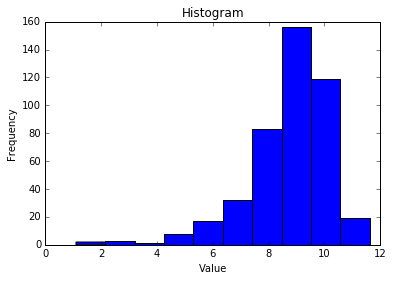

In [85]:
graph(log_F)

In [86]:
log_F.describe()

count    440.000000
mean       8.730544
std        1.480071
min        1.098612
25%        8.048059
50%        9.048286
75%        9.737064
max       11.627601
Name: Fresh, dtype: float64

In [72]:
good_data=np.log(data)

In [88]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [107]:
good_data[(good_data.Milk>8.19)&(good_data.Detergents_Paper <5.55)&
          (good_data.Delicatessen <6.01) &(good_data.Grocery<7.67)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
185,9.008224,8.771525,7.037906,7.687539,4.060443,5.509388
190,9.737197,8.740337,7.591357,8.900004,4.770685,4.158883


In [ ]:
good_data[(good_data.Fresh <)&(good_data.Milk <)&(good_data.Grocery <)&(good_data.Frozen <)&(good_data.Detergents_Paper <)&
          (good_data.Delicatessen <)]

In [114]:
good_data[(good_data.Grocery<7) & (good_data.Detergents_Paper<2)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


maximize the number of fresh food while minimize the number of frozen foods

In [116]:
good_data[(good_data.Fresh>9)&(good_data.Frozen<6)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
12,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
14,10.112654,9.155356,9.400217,5.683580,8.528726,7.681560
15,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023
25,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
32,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887
42,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
60,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
138,9.513182,8.356320,8.523970,5.043425,5.517453,8.092851
141,10.321507,9.491904,8.554296,5.771441,3.931826,7.279319


In [130]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [133]:
good_data[(good_data.Fresh <8)&(good_data.Milk <7)&(good_data.Grocery <7)&(good_data.Frozen <6)&(good_data.Detergents_Paper <5)&
          (good_data.Delicatessen <6)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
